## 白黒画像の解析

ここでは白黒の画像をパーシステントホモロジーで解析します。
ここで解説する内容は以下の通りです。

1. 画像からパーシステント図を計算する
2. その図をパラメータを変えながら可視化する
3. テキストデータにbirth-death pairを出力する
4. 基本的な逆解析(birth pixle, death pixelの出力)を行う

基本的にやっていることは、与えられた白黒画像の黒い領域を
膨らませたり萎ませたりして島や穴の生成と消滅を調べています。
https://arxiv.org/abs/1706.10082 の論文の2.3節、特にFig.2が参考になるでしょう。


### パーシステント図の計算

同じディレクトリには `binary-image.png` というファイルがあります。以下のような画像です。
これを解析してみましょう。


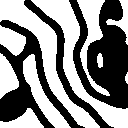

In [1]:
display < binary-image.png

まず最初に、

In [2]:
python3 -m homcloud.pict.binarize_nd -T picture2d -m black-base -t 128 -I -D -s -o binary-image.idiagram binary-image.png

とします。すると `binary-image.idiagram` というファイルが生成されます。これが
パーシステント図の情報を収めたファイルです。

* `-T picture2d` というので入力データが2次元画像であることを指定
  * 他にもテキストデータ(`text2d`)やnumpyのnpyやnpz(`npy`)などのフォーマットが指定できます。
* `-m black-base` というので黒の領域に注目することを指定
* `-t 128` というので白黒の閾値を128に決める(この入力画像では黒=0、白=255なのでどんな値でも
  あまり問題にはなりません)
* `-I -D` はHomCloudの便利機能を有効にするもので常に指定しておくと良いです
* `-o binary-image.idiagram`で出力ファイルを指定
* `-s` で画像が縮んでいくのと広がっていくのと両方を考慮することを指定(これは
  白黒画像の解析では常に有効にしておいて良いでしょう)

という意味です。

## パーシステント図の可視化


次に計算結果の0次のパーシステント図、つまり連結成分、島構造、を可視化しましょう。
上の計算で`-m black-base`と指定したので黒の島構造に注目します。
ポイントクラウドの場合と同様、`plot_PD`を使います。
`-d 0`で0次であることを、`-l`でヒストグラムの色付けを
log scaleにすることを指定します。
`-o binary-image-pd0.png`で出力ファイル名を指定します。


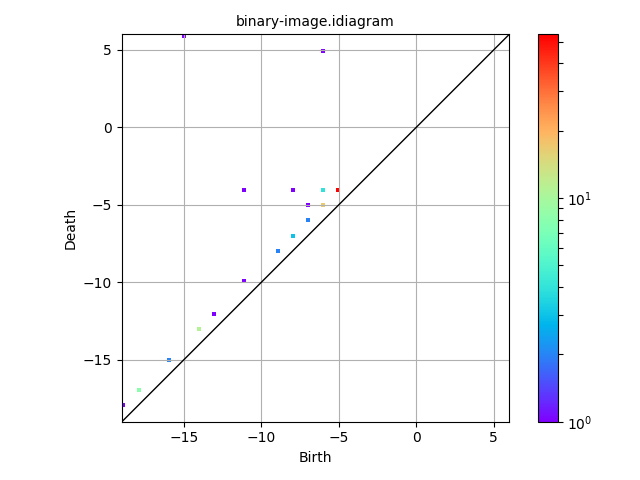

In [5]:
python3 -m homcloud.plot_PD -d 0 -l --aspect equal binary-image.idiagram -o binary-image-pd0.png
display < binary-image-pd0.png

何か小さい点が図の上にぽうぽつと現れます。実はbirth time、death timeは
この画像解析ルールだと整数の値しかとりません。デフォルトのヒストグラムは
128x128で計算しますから、これは細かすぎるのです。またこの図からすべての
birth time, death timeは-20〜+7 くらいの範囲にあることがわかりますので、
これらをうまく表示されるようにプロットの領域や解像度を調整します。
`-x "[-20.5:7.5]"`でプロットする範囲を -20.5 から 7.5 に、
ヒストグラムの分割を28x28に指定します。birth time、death timeは整数値なので、
ヒストグラムの各ビンの中心が整数になるように、±0.5の余裕を取るようにしています。

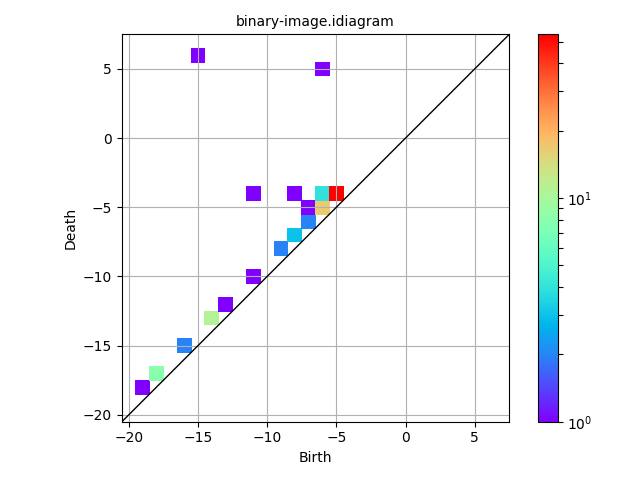

In [7]:
python3 -m homcloud.plot_PD -d 0 -l -x "[-20.5:7.5]" -X 28 --aspect equal binary-image.idiagram -o binary-image-pd0.png
display < binary-image-pd0.png

### テキストファイルへの出力

ここはポイントクラウドの場合と同じです。つまり以下のようにすると
`binary-image-pd0.txt`に保存されます。

In [8]:
python3 -m homcloud.dump_diagram -d 0 -S no binary-image.idiagram -o binary-image-pd0.txt    

In [9]:
head binary-image-pd0.txt

-19 -18
-18 -17
-18 -17
-18 -17
-18 -17
-18 -17
-18 -17
-18 -17
-18 -17
-16 -15


さて、上のパーシステント図を見ると(-5,-4)の所に何かbirth death pairが
集中しているようです。これが何か調べてみましょう。HomCloudのbirth pixel、
death pixel出力機能を使ってみましょう。これは島(連結成分)が生まれた/死んだ
ときのピクセルの位置を出力するものです。birth/death pixelについて詳しくは
https://arxiv.org/abs/1706.10082 の論文の2.3節、特にFig.2が参考になる
と思います(この論文ではbirth/death positionという名前で呼んでいます)。
birth/death positionを出力するには以下のコマンドをターミナルから実行します。
`-S yes`によって出力をonにします。


In [11]:
python3 -m homcloud.dump_diagram -d 0 -S yes binary-image.idiagram

-19 -18 (57,121) (56,121)
-18 -17 (46,111) (53,119)
-18 -17 (47,112) (46,112)
-18 -17 (48,113) (47,113)
-18 -17 (49,114) (48,114)
-18 -17 (50,115) (49,115)
-18 -17 (51,116) (50,116)
-18 -17 (52,117) (51,117)
-18 -17 (53,118) (52,118)
-16 -15 (73,111) (72,112)
-16 -15 (74,110) (73,110)
-15 6 (99,20) (67,50)
-14 -13 (40,112) (40,111)
-14 -13 (83,113) (82,113)
-14 -13 (84,114) (83,114)
-14 -13 (85,115) (84,115)
-14 -13 (86,116) (85,116)
-14 -13 (87,117) (86,117)
-14 -13 (88,118) (87,118)
-14 -13 (89,119) (88,119)
-14 -13 (90,120) (89,120)
-14 -13 (91,121) (90,121)
-14 -13 (92,122) (91,122)
-13 -12 (37,114) (37,113)
-11 -4 (7,111) (25,104)
-11 -10 (9,112) (8,112)
-9 -8 (74,97) (75,99)
-9 -8 (75,98) (74,98)
-8 -4 (44,32) (82,23)
-8 -7 (47,96) (46,100)
-8 -7 (50,94) (49,94)
-8 -7 (71,95) (71,96)
-7 -6 (48,34) (47,34)
-7 -5 (62,15) (59,18)
-7 -6 (68,93) (68,94)
-6 5 (4,29) (47,69)
-6 -4 (25,54) (21,50)
-6 -5 (26,55) (25,55)
-6 -5 (28,105) (28,106)
-6 -5 (36,30) (36,31)
-6 -5 (51,27) (50,27)
-

これは各行、1列目がbirth time、2列目がdeath time、3列目が
birth pixelの座標、4列目がdeath pixelの座標です。
ここで注意すべきは、座標は(y,x)の順に並んでいるということです。
これはHomCloudの仕様の問題ですが、全体の整合性を保つためどうしても
こうなっているので気を付けてください。



さて、ここから(-5,-4)に対応するものだけを取り出しましょう。パイプ機能と
grepというコマンドを利用すると必要なものだけ取り出せます(grepについて詳しくはご自分で
勉強してください)。

In [12]:
python3 -m homcloud.dump_diagram -d 0 -S yes binary-image.idiagram | grep "^-5 -4"   

-5 -4 (9,35) (8,35)
-5 -4 (10,36) (9,36)
-5 -4 (11,37) (10,37)
-5 -4 (18,45) (17,45)
-5 -4 (19,46) (18,46)
-5 -4 (20,48) (19,48)
-5 -4 (21,49) (20,49)
-5 -4 (25,103) (24,103)
-5 -4 (27,15) (32,26)
-5 -4 (28,17) (27,17)
-5 -4 (30,58) (29,58)
-5 -4 (31,23) (30,23)
-5 -4 (32,25) (31,25)
-5 -4 (42,80) (99,108)
-5 -4 (44,79) (43,79)
-5 -4 (48,0) (50,4)
-5 -4 (49,1) (48,1)
-5 -4 (50,3) (49,3)
-5 -4 (73,81) (72,81)
-5 -4 (75,82) (74,82)
-5 -4 (82,85) (81,85)
-5 -4 (84,86) (83,86)
-5 -4 (86,87) (85,87)
-5 -4 (87,67) (86,67)
-5 -4 (87,88) (86,88)
-5 -4 (91,69) (90,69)
-5 -4 (92,48) (91,48)
-5 -4 (93,70) (92,70)
-5 -4 (94,49) (93,49)
-5 -4 (94,71) (93,71)
-5 -4 (94,95) (93,95)
-5 -4 (95,50) (94,50)
-5 -4 (96,51) (95,51)
-5 -4 (99,53) (98,53)
-5 -4 (102,79) (101,79)
-5 -4 (103,81) (102,81)
-5 -4 (104,83) (103,83)
-5 -4 (105,84) (104,84)
-5 -4 (106,85) (105,85)
-5 -4 (108,35) (107,35)
-5 -4 (109,36) (108,36)
-5 -4 (111,37) (110,37)
-5 -4 (112,38) (111,38)
-5 -4 (112,64) (111,64)
-5 -4 (114,39) (11

うまく行っているようです。0次のパーシステントホモロジーの場合には
birth pixelのほうが重要です(その構造の中心におよそ対応します)。
そこでこのピクセルを入力画像の上に表示してみましょう。`view_index_pict` というプログラムを使います。

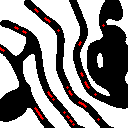

In [18]:
python3 -m homcloud.view_index_pict -d 0 -B -f "birth == -5" -f "death == -4" --no-label \
    binary-image.png binary-image.idiagram -o binary-image-markers.png
display < binary-image-markers.png

* `-d 0` でホモロジーの次数を指定します。ここでは0次です
* `-B` で birth pixel を描画することを指定します。
* `-f "birth == -5" -f "death == -4"` で(-5, -4)のbirth-death pairのみを使うことを指定します。
  これは不等号も利用可能で、例えば`-f "birth >= -3" -f "birth <= -1"` とすると birth time が
  -3 より大きく -1 より小さな birth-death pair のみ表示します。
* `--no-label` は点のみを表示することを指定します。
* `binary-image.png binary-image.idiagram`で画像ファイルとPDのデータファイルを指定します
* `-o binary-image-markers.png`で出力ファイルを指定します。
他にも様々なオプションを指定できるのでヘルプを確認してください。

黒い道路状の部分に赤い点が表示されています。これは(-5, -4)というのは
幅の1/2が5ピクセルくらいの道状の形状に対応していることを意味しています。

## 強力な逆解析

ここでは0次のパーシステント図を見てきました。この図の上の各点は何らかの意味でデータの島構造を表現しているのですが、
上のbirth pixelではその「中心」とおぼしき一点のみを可視化しています。これはこれで手軽で便利なのですが
島を具体的に見ることができないのでしょうか。実は2次元画像の場合はそれを計算することが可能です。

`pict.tree`というモジュールで計算し、`pict.show_volume_2d`モジュールで可視化できます。

In [22]:
python3 -m homcloud.pict.tree -m black-base -s -t 128 -T picture2d binary-image.png -o binary-image.p2mt

`pict.tree`のオプションの意味は以下の通りです。まず -m -T -t -s は最初にパーシステント図を計算したものと同じです。
* `-m black-base` で白黒2値解析で黒に注目することを意味します。
* `-T picture2d` は入力が二次元画像であることを意味します。
* `-t 128` というので白黒の閾値を128に決める
* `-s` で画像が縮んでいくのと広がっていくのと両方を考慮することを指定(これは 白黒画像の解析では常に有効にしておいて良いでしょう)

あと、`-o binary-image.p2mt`で出力ファイルを指定します。`.p2mt`が普通使われる拡張子です。

可視化には `pict.show_volume_2d` モジュールを使います。
* `-d 0 -f "birth == -5" -f "death == -4"`は`view_index_pict`の場合と同じです。0次のPDのbirth/deathが-5/-4の点を可視化します
* `-B` は birth pixel を表示します
* `--volume` で領域を可視化することを指定します。`--alpha 0.5`は色の濃さを指定します。0から1の値を指定します。
* `binary-image.png binary-image.p2mt -o binary-image-volumes.png` で画像ファイル、pict.treeの計算結果ファイル、出力ファイルをそれぞれ指定します。

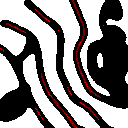

In [48]:
python3 -m homcloud.pict.show_volume_2d -d 0 -f "birth == -5" -f "death == -4"  -B -volume --alpha 0.5 - \
    binary-image.png binary-image.p2mt -o binary-image-volumes.png 
display < binary-image-volumes.png

この図を見ると、黒い領域の内側に細い赤い領域が塗られていることがわかります。拡大して見ると薄い赤と
濃い赤があることがわかると思います。これは薄い赤が対象となる領域で、濃い赤がbirth-pixelです。

黒い道路状の領域が(-5, -4)のbirth-death pairの鍵となっていることがよりわかると思います。

以上で白黒画像解析の解説は終わりです。